In [1]:
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import scipy.io
import json
import numpy as np
from format_data import *
from utils import *
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
t_pre = 0.2#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)
#gc = np.arange(0, 32)

In [5]:
#path = 'Y:/eTheremin/clara/ALTAI_20240910_SESSION_00/filtered/std.min = 3/'
path = '/mnt/working4/clara/data6/eTheremin/clara/ALTAI_20240724_SESSION_02/'
#path_gc = '/mnt/working4/clara/data2/eTheremin/ALTAI/ALTAI_20240902_SESSION_00/headstage_0/'
data = np.load(path+'data_ss_0.02.npy', allow_pickle=True)
features = np.load(path+'features_0.02.npy', allow_pickle=True)
gc = np.arange(len(data))
#tail = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tail')
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
# #mc = get_psth(data, features, t_pre, t_post, bin_width, gc, 'mapping change')
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback')

In [6]:
tracking,label_tracking,ici = get_psth_and_labels(data, features, t_pre, t_post, bin_width, gc, 'playback')

In [7]:
print(len(tracking),len(tracking[0]),len(tracking[0][0]))
print(len(label_tracking),len(ici))
print(features.shape)

# 61 6979 140
# 5352
# (180348,)

61 6477 140
6477 493
(180348,)


In [18]:
#path = 'Y:/eTheremin/clara/ALTAI_20240910_SESSION_00/filtered/std.min = 3/'
path = '/mnt/working4/clara/data2/eTheremin/ALTAI/ALTAI_20240724_SESSION_0&/headstage_0/'
data = np.load(path+'data_0.005.npy', allow_pickle=True)
features = np.load(path+'features_0.005.npy', allow_pickle=True)
gc = np.load(path+'good_clusters.npy', allow_pickle=True)
#tail = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tail')
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
#mc = get_psth(data, features, t_pre, t_post, bin_width, gc, 'mapping change')
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback')

KeyboardInterrupt: 

In [18]:
print((len(tracking),len(tracking[0])))

(32, 0)


PCA pour un cluster

[[1 1 1 ... 0 2 0]
 [0 0 0 ... 1 1 0]
 [0 1 1 ... 1 2 0]
 ...
 [1 1 1 ... 1 0 0]
 [0 0 2 ... 0 1 2]
 [0 0 0 ... 2 0 2]]
Taille de pca_result: (9641, 2)
Taille de condition: 9641


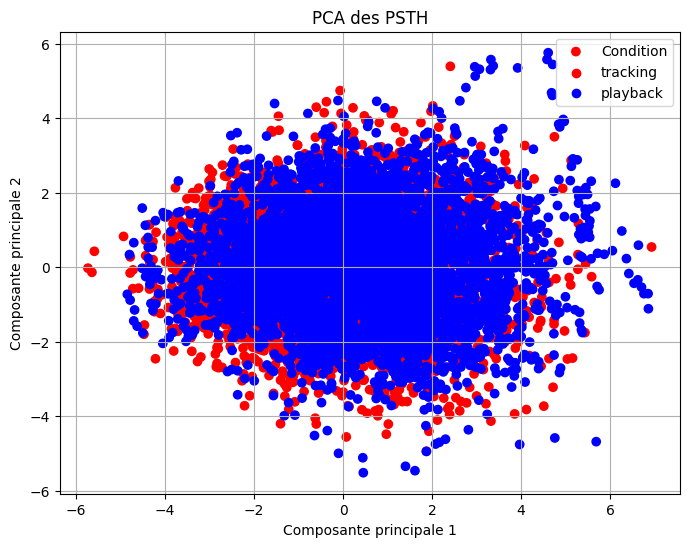

In [9]:
cluster = 8
tr_c0 = tracking[cluster]
tr_labels = np.zeros(len(tr_c0))
pb_c0 = playback[cluster]
pb_labels = np.ones(len(pb_c0))
c0 = np.vstack((tr_c0, pb_c0))
print(c0[0:10])
condition = np.hstack((tr_labels, pb_labels))

# Simulons quelques données PSTH pour plusieurs neurones
# print(f"Taille de pb0_c0: {len(pb_c0)}")
# print(f"Taille de pb0_c0: {len(tr_c0)}")
psth_data = c0
# Standardisation des données
scaler = StandardScaler()
psth_data_scaled = scaler.fit_transform(psth_data)
# Appliquer la PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(psth_data_scaled)
# Couleurs en fonction des conditions
colors = ['r' if cond == 0 else 'b' for cond in condition]
print(f"Taille de pca_result: {pca_result.shape}")
print(f"Taille de condition: {len(condition)}")
# Visualiser les résultats avec des couleurs différentes
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, marker='o', label='Condition')
# Ajout de la légende et du titre
plt.title('PCA des PSTH')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)
# Ajout d'une légende pour les couleurs
plt.scatter([], [], c='r', label='tracking')
plt.scatter([], [], c='b', label='playback')
plt.legend()
plt.show()      

PCA sur triggerxcluster pour un bin de temps donné

(6970, 61, 140)
c0 (13949, 61, 140)
c0 bin (13949, 61)
(6979,)
(6970,)
(13949,)
(13949, 2)


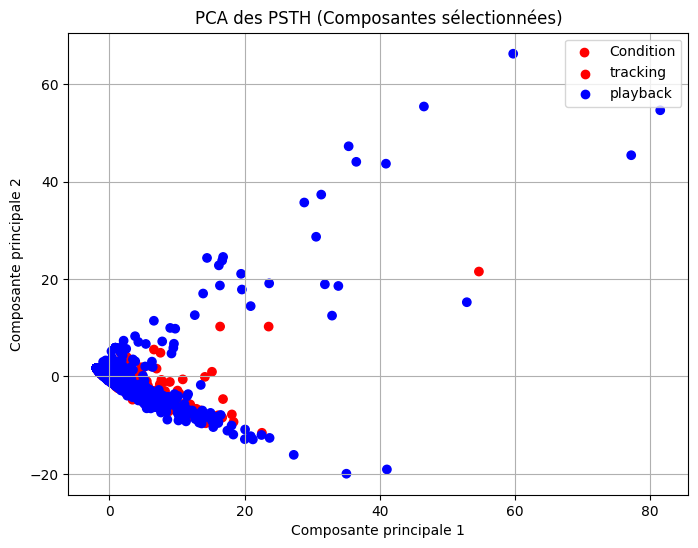

In [15]:
tracking_transpose = np.moveaxis(tracking, 1, 0)
playback_transpose = np.moveaxis(playback, 1, 0)
c0 = np.vstack((tracking_transpose, playback_transpose)) #format (9182, 31, 140)  trigger*cluster*nbr bin
print(playback_transpose.shape)
bin = 120
c0_bin = c0[:,:,bin]
print(f"c0 {c0.shape}") #format (9182, 31)
print(f"c0 bin {c0_bin.shape}")

tr_labels = np.zeros(len(tracking_transpose))
pb_labels = np.ones(len(playback_transpose))
print(tr_labels.shape)
print(pb_labels.shape)

condition = np.hstack((tr_labels, pb_labels)) #format : (9182,)
print(condition.shape)

# # Simulons quelques données PSTH pour plusieurs neurones
psth_data = c0_bin

# Standardisation des données
scaler = StandardScaler()
psth_data_scaled = scaler.fit_transform(psth_data)

# Appliquer la PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(psth_data_scaled)

selected_components = pca_result[:, 0:2]  # Cela prend la 3ème et 4ème composante

print(selected_components.shape)
# Couleurs en fonction des conditions
colors = ['r' if cond == 0 else 'b' for cond in condition]

# Visualiser les résultats avec les composantes sélectionnées
plt.figure(figsize=(8, 6))
plt.scatter(selected_components[:, 0], selected_components[:, 1], c=colors, marker='o', label='Condition')

# Ajout de la légende et du titre
plt.title('PCA des PSTH (Composantes sélectionnées)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)

# Ajout d'une légende pour les couleurs
plt.scatter([], [], c='r', label='tracking')
plt.scatter([], [], c='b', label='playback')
plt.legend()
plt.show()

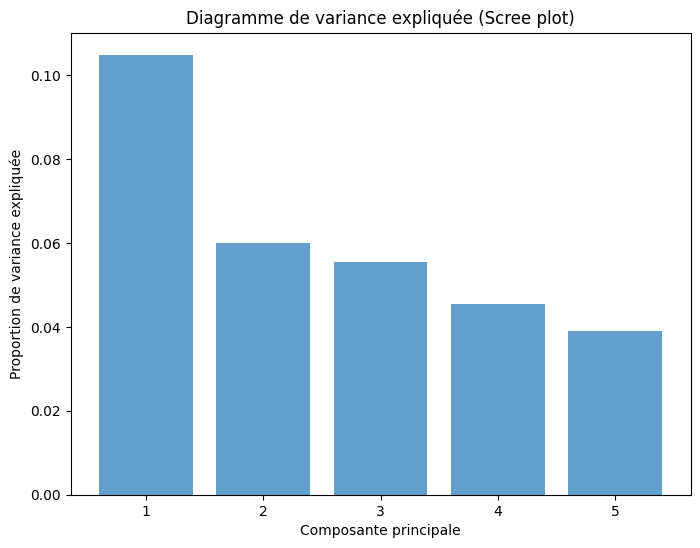

In [27]:
# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

# Diagramme de variance expliquée (Scree plot)
plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Proportion de variance expliquée')
plt.xlabel('Composante principale')
plt.title('Diagramme de variance expliquée (Scree plot)')
plt.show()


ML régression logistique

In [6]:
# Import des bibliothèques nécessaires
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Supposez que X est votre tableau de caractéristiques et y vos étiquettes binaires
tr_c0 = tracking
pb_c0 = playback
tracking_transpose = np.moveaxis(tracking, 1, 0)
playback_transpose = np.moveaxis(playback, 1, 0)
c0 = np.vstack((tracking_transpose, playback_transpose)) #format (9182, 31, 140)  trigger*cluster*nbr bin
print(tracking_transpose.shape)
bin = 60
c0_bin = c0[:,:,bin]
print(f"c0 {c0.shape}") #format (9182, 31)
print(f"c0 bin {c0_bin.shape}")

tr_labels = np.zeros(len(tracking_transpose))
pb_labels = np.ones(len(playback_transpose))
print(tr_labels.shape)
print(pb_labels.shape)

condition = np.hstack((tr_labels, pb_labels)) #format : (9182,)
print(condition.shape)

psth_data = c0_bin

# Standardisation des données
scaler = StandardScaler()
psth_data_scaled = scaler.fit_transform(psth_data)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(psth_data_scaled, condition, test_size=0.3, random_state=42)

# Créer le modèle de régression logistique
logreg = LogisticRegression()

# Entraîner le modèle
logreg.fit(X_train, y_train)

# Faire des prédictions
y_pred = logreg.predict(X_test)

# Évaluer le modèle
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


(4104, 60, 140)
c0 (8219, 60, 140)
c0 bin (8219, 60)
(4104,)
(4115,)
(8219,)
Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.51      0.57      1229
         1.0       0.60      0.73      0.66      1237

    accuracy                           0.62      2466
   macro avg       0.63      0.62      0.62      2466
weighted avg       0.63      0.62      0.62      2466

Confusion Matrix:
 [[626 603]
 [332 905]]


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(psth_data_scaled, condition, test_size=0.3, random_state=42)

# Créer le modèle SVM (Support Vector Classifier)
svm_model = SVC(kernel='linear')  # Vous pouvez essayer d'autres kernels comme 'rbf', 'poly', etc.

# Entraîner le modèle
svm_model.fit(X_train, y_train)

# Faire des prédictions
y_pred = svm_model.predict(X_test)

# Évaluer le modèle
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.43      0.53      1229
         1.0       0.59      0.81      0.68      1237

    accuracy                           0.62      2466
   macro avg       0.64      0.62      0.61      2466
weighted avg       0.64      0.62      0.61      2466

Confusion Matrix:
 [[ 534  695]
 [ 235 1002]]


In [ ]:
# Visualisation si vous avez deux caractéristiques (2D)
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Frontière de décision de la régression logistique')
    plt.show()

# Supposons que vous n'ayez que deux caractéristiques pour simplifier
plot_decision_boundary(X_test, y_test, logreg)

PCA sur une bande de fréquences plus réduite

In [99]:
#path = 'Y:/eTheremin/clara/ALTAI_20240910_SESSION_00/filtered/std.min = 3/'
path = '/mnt/working4/clara/data6/eTheremin/clara/ALTAI_20240725_SESSION_00/'
path_gc = '/mnt/working4/clara/data2/eTheremin/ALTAI/ALTAI_20240725_SESSION_00/headstage_0/'
data = np.load(path+'data_ss_0.02.npy', allow_pickle=True)
features = np.load(path+'features_0.02.npy', allow_pickle=True)
gc = np.arange(len(data))

In [100]:
#tail = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tail')
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking') #[1550,2050]
#mc = get_psth(data, features, t_pre, t_post, bin_width, gc, 'mapping change')
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback')

(918, 26, 140)
(918,)
(745,)
(1663,)
(1663, 2)


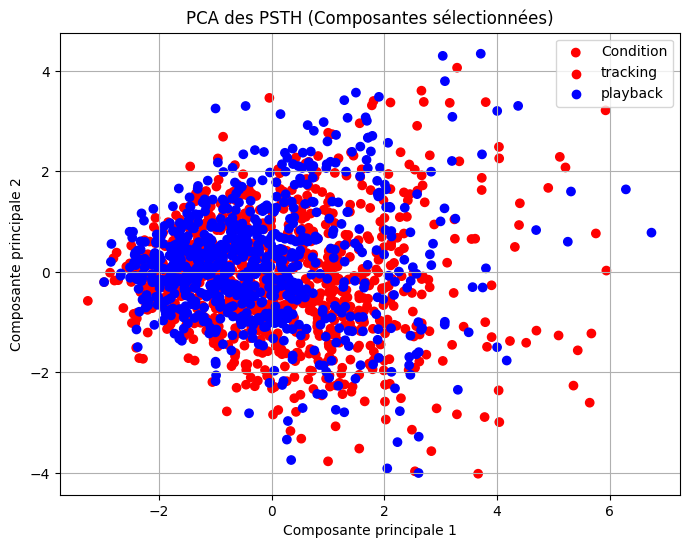

In [98]:
# data.shape  (70,210314)
# features.shape  (210314,)

tracking_transpose = np.moveaxis(tracking, 1, 0)  #shape (4960,70,140)  avec la bande de fréquences restreinte (2940, 70, 140)
playback_transpose = np.moveaxis(playback, 1, 0)  #shape (4977,70,140)  avec la bande de fréquences restreinte (2945, 70, 140)
#print(playback_transpose.shape)

c0 = np.vstack((tracking_transpose, playback_transpose)) #format (9182, 31, 140)  trigger*cluster*nbr bin
print(tracking_transpose.shape)
bin = 120
c0_bin = c0[:,:,bin]
# print(f"c0 {c0.shape}") #format (9182, 31)
# print(f"c0 bin {c0_bin.shape}")

tr_labels = np.zeros(len(tracking_transpose))
pb_labels = np.ones(len(playback_transpose))
print(tr_labels.shape)
print(pb_labels.shape)

condition = np.hstack((tr_labels, pb_labels)) #format : (9182,)
print(condition.shape)

# # Simulons quelques données PSTH pour plusieurs neurones
psth_data = c0_bin

# Standardisation des données
scaler = StandardScaler()
psth_data_scaled = scaler.fit_transform(psth_data)

# Appliquer la PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(psth_data_scaled)

selected_components = pca_result[:, 0:2]  # Cela prend la 3ème et 4ème composante

print(selected_components.shape)
# Couleurs en fonction des conditions
colors = ['r' if cond == 0 else 'b' for cond in condition]

# Visualiser les résultats avec les composantes sélectionnées
plt.figure(figsize=(8, 6))
plt.scatter(selected_components[:, 0], selected_components[:, 1], c=colors, marker='o', label='Condition')

# Ajout de la légende et du titre
plt.title('PCA des PSTH (Composantes sélectionnées)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)

#Ajout d'une légende pour les couleurs
plt.scatter([], [], c='r', label='tracking')
plt.scatter([], [], c='b', label='playback')
plt.legend()
plt.show()

PCA sur plusieurs sessions indicateurs sustain et evoked response par cluster

In [3]:
#altai_playback_sessions = ['ALTAI_20240724_SESSION_01', 'ALTAI_20240724_SESSION_02', 'ALTAI_20240725_SESSION_00']
altai_playback_sessions = ['ALTAI_20240724_SESSION_01', 'ALTAI_20240724_SESSION_02', 'ALTAI_20240725_SESSION_00', 'ALTAI_20240726_SESSION_01',
                          'ALTAI_20240809_SESSION_00', 'ALTAI_20240814_SESSION_00', 'ALTAI_20240822/ALTAI_20240822_SESSION_00', 'ALTAI_20240902_SESSION_00']



# Initialisation des listes pour stocker les données
data_list = []
features_list = []
gc_list = []

for session in altai_playback_sessions:
    path = '/mnt/working4/clara/data2/eTheremin/ALTAI/' + session + '/headstage_0/'  # Remplacer par le bon numéro de headstage si nécessaire

    # Chargement des données pour chaque session
    data = np.load(path + 'data_0.005.npy', allow_pickle=True)
    features = np.load(path + 'features_0.005.npy', allow_pickle=True)
    
    # Vérification et chargement des clusters
    if os.path.exists(path + 'good_clusters.npy'):
        gc = np.load(path + 'good_clusters.npy', allow_pickle=True)
    else: 
        gc = np.arange(32)  # Valeur par défaut si les clusters n'existent pas
    
    # Ajout des données dans les listes
    data_list.append(data)
    features_list.append(features)
    gc_list.append(gc)

# Exemple d'utilisation des listes data_list, features_list et gc_list
# Vous pouvez itérer à nouveau si vous voulez traiter ces données par session

# for i, session in enumerate(altai_playback_sessions):
#     print(f"Session {session}:")
#     print(f"Data shape: {data_list[i].shape}")
#     print(f"Features shape: {features_list[i].shape}")
#     print(f"Good clusters: {gc_list[i]}")


Session ALTAI_20240724_SESSION_01:
Data shape: (32, 721393)
Features shape: (721393,)
Good clusters: [ 5 26 20  3 25 24  1 30  8 23  6 29 31 21  7 14 10  0  2 22 18 11 19 15
 12  9 28  4 17 13 16 27]
Session ALTAI_20240724_SESSION_02:
Data shape: (32, 721564)
Features shape: (721564,)
Good clusters: [20 21 24 26 19 30 25 15  7  9  8 29 31  6 16 28 17  3  4 10 14  1 22 27
  0  5 12 13 11 18  2 23]
Session ALTAI_20240725_SESSION_00:
Data shape: (32, 721980)
Features shape: (721980,)
Good clusters: [21 22  5 15 16 23 29 18 20 17  3 19 25  1  6 24  7  4  2 12 26 14 13  0
 31 10 30  8 11 28  9 27]
Session ALTAI_20240726_SESSION_01:
Data shape: (32, 841256)
Features shape: (841256,)
Good clusters: [20 24  7 19 13 26  1 29 15 14 31  3  6 21 25 16 23  0 12 28  5  4  2 22
  8 18 11  9 27 10 30 17]
Session ALTAI_20240809_SESSION_00:
Data shape: (32, 842600)
Features shape: (842600,)
Good clusters: [18 24 10 29 31 17  9 13  2 21  6 16 15 28 27 11  5  1 23 20 25  3  8 14]
Session ALTAI_20240814_SE

In [4]:
# Initialisation des listes
liste1_t0 = []
liste2_t0 = []
liste1_p0 = []
liste2_p0 = []
liste3_t0 = []
liste3_p0 = []
mean_psth_tracking = []
mean_psth_playback = []

# Boucle sur les sessions
for k in range(len(altai_playback_sessions)):

    # Calcul des PSTH pour "tracking" et "playback"
    tracking = get_psth(data_list[k], features_list[k], t_pre, t_post, bin_width, gc_list[k], 'tracking')
    playback = get_psth(data_list[k], features_list[k], t_pre, t_post, bin_width, gc_list[k], 'playback') 

    # Moyenne des PSTH pour chaque cluster
    mean_psth_tracking = [np.nanmean(tracking[cluster], axis=0) for cluster in np.arange(len(gc_list[k]))]
    mean_psth_playback = [np.nanmean(playback[cluster], axis=0) for cluster in np.arange(len(gc_list[k]))]
    
    # Calcul des indicateurs pour "tracking"
    sustained_activity = get_sustained_activity(mean_psth_tracking, t_pre, t_post, bin_width)
    liste1_t0.extend(sustained_activity)
    
    evoked_response = get_total_evoked_response(mean_psth_tracking, t_pre, t_post,
                                                bin_width, thresh=None, t0=0, t1=len(mean_psth_tracking))
    liste2_t0.extend(evoked_response)

    # Calcul des indicateurs pour "playback"
    sustained_activity_p = get_sustained_activity(mean_psth_playback, t_pre, t_post, bin_width)
    liste1_p0.extend(sustained_activity_p)
    
    evoked_response_p = get_total_evoked_response(mean_psth_playback, t_pre, t_post,
                                                  bin_width, thresh=None, t0=0, t1=len(mean_psth_playback))
    liste2_p0.extend(evoked_response_p)

    # Calcul de liste3_t0 et liste3_p0
    # Il faut s'assurer que liste1_t0 et liste2_t0 ont la même longueur avant de faire la soustraction
    liste3_t0 = [a - b for a, b in zip(liste2_t0, liste1_t0)]
    liste3_p0 = [a - b for a, b in zip(liste2_p0, liste1_p0)]

    # Affichage des résultats intermédiaires
#     print(f"Session {k}:")
#     print(f"Liste1_t0: {liste1_t0}")
#     print(f"Liste1_p0: {liste1_p0}")
#     print(f"Liste2_t0: {liste2_t0}")
#     print(f"Liste2_p0: {liste2_p0}")
#     print(f"Liste3_t0 (tracking): {liste3_t0}")
#     print(f"Liste3_p0 (playback): {liste3_p0}")

# # Résultats finaux après la boucle
# print("Résultats finaux :")
# print(f"Liste1_t0 (tracking): {liste1_t0}")
# print(f"Liste1_p0 (playback): {liste1_p0}")
# print(f"Liste2_t0 (tracking): {liste2_t0}")
# print(f"Liste2_p0 (playback): {liste2_p0}")
# print(f"Liste3_t0 (tracking): {liste3_t0}")
# print(f"Liste3_p0 (playback): {liste3_p0}")





[0.27622775 0.27294534 0.26713799 0.27471279 0.27155662 0.27471279
 0.26120439 0.26574927 0.27180912 0.27117788 0.27547027 0.27193536
 0.2725666  0.27281909 0.27471279 0.27673274 0.2704204  0.26915793
 0.27559652 0.27547027 0.28039389 0.27433405 0.27648024 0.28405504
 0.28885242 0.28632748 0.28153011 0.27673274 0.28089888 0.27938392
 0.27332408 0.28279258 0.28279258 0.2874637  0.28443378 0.27875268
 0.29036738 0.28544376 0.28796869 0.28872617 0.28291882 0.28847368
 0.30614821 0.2933973  0.3350587  0.36914531 0.3675041  0.35753061
 0.34490595 0.3274839  0.31498548 0.30589572 0.31435425 0.31246055
 0.32192905 0.31031435 0.30438076 0.30122459 0.29579599 0.28872617
 0.28670622 0.28456003 0.2877162  0.29175609 0.2933973  0.28708496
 0.27521778 0.28329756 0.27105163 0.28948365 0.27837394 0.28165636
 0.27193536 0.28519126 0.27370282 0.2798889  0.28430754 0.27143037
 0.26991541 0.28329756 0.27269284 0.27925767 0.28569625 0.28153011
 0.27547027 0.27458654 0.27496528 0.28784244 0.28418129 0.2737

In [17]:
print("taille 1p :", len(liste1_p0))
print("taille 1t :", len(liste1_t0))
print("taille 2p :", len(liste2_p0))
print("taille 2t :", len(liste2_t0))

taille 1p : 226
taille 1t : 226
taille 2p : 452
taille 2t : 452


Forme de indicateur_tracking : [[0.27674934717174193, 0.28885241762403735, 0.012103070452295417], [0.5069502122937692, 0.3691453099356142, -0.13780490235815507], [0.47071409112352913, 0.519757606362833, 0.049043515239303836], [0.2633140419537671, 0.6128014139628835, 0.34948737200911634], [0.4957840251430243, 0.4897108950890039, -0.006073130054020381], [0.5428840058737933, 0.6415856583764676, 0.09870165250267438], [0.6108545571731373, 0.2742078020451963, -0.336646755127941], [0.4985116180173955, 0.2970584522156293, -0.2014531658017662], [0.5468275536714531, 0.5111728317131675, -0.03565472195828556], [0.34940431497883706, 0.6016917055927282, 0.25228739061389116], [0.4550528574940696, 0.5610402726928418, 0.10598741519877225], [0.5199071090173356, 0.6689811892437824, 0.14907408022644675], [0.36925494521558283, 0.6302234566342634, 0.26096851141868055], [0.5530800869108766, 0.7305895720237344, 0.1775094851128578], [0.6047016923700489, 0.5094053781088247, -0.0952963142612242], [0.533800889042

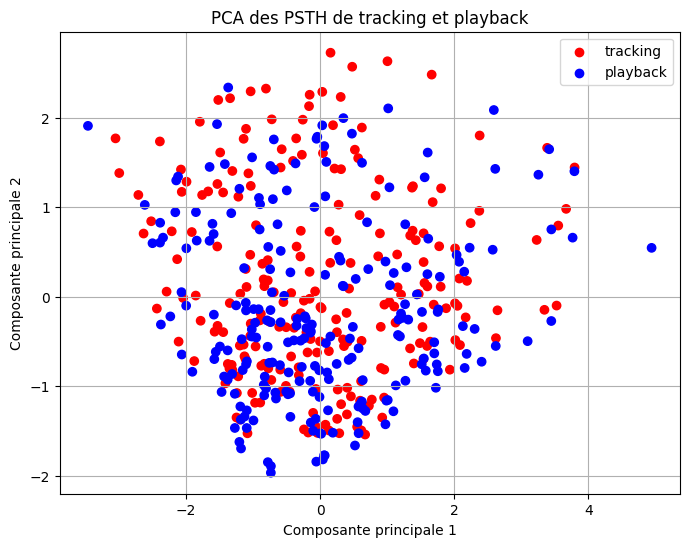

In [18]:
indicateur_tracking = [list(trio) for trio in zip(liste1_t0, liste2_t0, liste3_t0)]
indicateur_playback = [list(trio) for trio in zip(liste1_p0, liste2_p0, liste3_p0)]
# print("Forme de indicateur_tracking :", len(indicateur_tracking[0]))
# print("Forme de indicateur_playback :", len(indicateur_playback[0]))
# indicateur_tracking = [list(trio) for trio in zip(liste1_t, liste2_t)]
# indicateur_playback = [list(trio) for trio in zip(liste1_p, liste2_p)]
print("Forme de indicateur_tracking :", indicateur_tracking)
print("Forme de indicateur_playback :", indicateur_playback)


#Empilement des indicateurs pour les deux conditions (tracking et playback)
indicateurs = np.vstack((indicateur_tracking, indicateur_playback))
print("ind 2 t:", liste2_t0)
print("ind 2 p:", liste2_p0)
# print("ind 2 t:", liste2_t)
# print("ind 2 p:", liste2_p)
print("indicateur_tracking:", indicateur_tracking)
print("indicateur_playback:", indicateur_playback)
print("Shape de indicateurs (empilés):", indicateurs.shape)

# Standardisation des données
scaler = StandardScaler()
indicateurs_scaled = scaler.fit_transform(indicateurs)

# Appliquer la PCA avec 3 composantes
pca = PCA(n_components=3)
pca_result = pca.fit_transform(indicateurs_scaled)

# Création des étiquettes pour la visualisation
# 0 pour tracking et 1 pour playback
condition = np.hstack((np.zeros(len(indicateur_tracking)), np.ones(len(indicateur_playback))))
#condition = np.hstack((np.zeros(len(liste1_t)), np.ones(len(liste1_p))))

# Couleurs en fonction des conditions
colors = ['r' if cond == 0 else 'b' for cond in condition]

# Visualiser les résultats de la PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, marker='o')

# Ajout de la légende et du titre
plt.title('PCA des PSTH de tracking et playback')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)

# Ajout d'une légende pour les couleurs
plt.scatter([], [], c='r', label='tracking')
plt.scatter([], [], c='b', label='playback')
plt.legend()

plt.show()

In [5]:
session = ['ALTAI_20240902_SESSION_00']
path = '/mnt/working4/clara/data2/eTheremin/ALTAI/' + session[0] + '/headstage_0/' 
features = np.load(path + 'features_0.005.npy', allow_pickle=True)
data = np.load(path + 'data_0.005.npy', allow_pickle=True)
if os.path.exists(path + 'good_clusters.npy'):
        gc = np.load(path + 'good_clusters.npy', allow_pickle=True)
else: 
    gc = np.arange(32)  # Valeur par défaut si les clusters n'existent pas

In [35]:
features

array([{'Played_frequency': 0.0, 'Condition': -1.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 0.0, 'Condition': -1.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 0.0, 'Condition': -1.0, 'Block': 0.0, 'Frequency_changes': False},
       ...,
       {'Played_frequency': 3601.0, 'Condition': 0.0, 'Block': 2.0, 'Frequency_changes': False},
       {'Played_frequency': 3601.0, 'Condition': 0.0, 'Block': 2.0, 'Frequency_changes': False},
       {'Played_frequency': 3601.0, 'Condition': 0.0, 'Block': 2.0, 'Frequency_changes': False}],
      dtype=object)

In [9]:
# Utiliser un ensemble pour stocker les valeurs distinctes de 'condition' (en vérifiant la casse correcte)
import numpy as np

# Initialiser une liste pour stocker les valeurs de 'Condition'
condition = []

# Parcourir la liste de dictionnaires et extraire la clé 'Condition'
for k in range(len(features)):
    condition.append(features[k]['Condition'])

# Utiliser np.unique() pour obtenir les valeurs uniques et leur nombre d'occurrences
unique_condition, counts = np.unique(condition, return_counts=True)

# Créer un dictionnaire avec les valeurs uniques et leurs occurrences
condition_counts = dict(zip(unique_condition, counts))

# Afficher le dictionnaire
print(condition_counts)


{-1.0: 60921, -0.8894736842090502: 1, -0.6921052631565071: 1, -0.49473684210396407: 1, -0.29736842105142103: 1, -0.09999999999887799: 1, 0.0: 70317, 0.0010893246187726052: 1, 0.0092592592592885: 1, 0.017429193899804393: 1, 0.02559912854032029: 1, 0.03376906318083618: 1, 0.04193899782135208: 1, 0.050108932461867976: 1, 0.05827886710238387: 1, 0.06644880174289976: 1, 0.07461873638341565: 1, 0.08278867102393156: 1, 0.09095860566444745: 1, 0.09912854030496335: 1, 0.10729847494547924: 1, 0.11546840958599514: 1, 0.12363834422651103: 1, 0.13180827886702692: 1, 0.1399782135075428: 1, 0.1481481481480587: 1, 0.15631808278876036: 1, 0.16448801742927627: 1, 0.17265795206979215: 1, 0.18082788671030806: 1, 0.18899782135082394: 1, 0.19716775599133984: 1, 0.20533769063185572: 1, 0.21350762527237163: 1, 0.22167755991288754: 1, 0.22984749455340342: 1, 0.23801742919391933: 1, 0.2461873638344352: 1, 0.2543572984749511: 1, 0.262527233115467: 1, 0.2706971677559829: 1, 0.2788671023964988: 1, 0.28703703703701

In [11]:
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback')
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')

In [12]:
print(len(playback[0])*len(playback[0][0]),len(data[0]))

642740 841911


Etiquettes gauche droite

In [10]:
# étiquettes gauche droite
label_tracking = []  #plus aigu : 1  plus grave : 0
label_playback = []
label_tail = []
tracking_final = []
playback_final = []

#condition playback = 1
#condition tracking = 0
#condition tail = -1

# Parcourir les dictionnaires consécutifs dans 'features'
for i in range(1, len(features)):
    # Vérifier si 'Frequency_changes' passe de False à True
    if features[i]['Condition']==1.0 :  #playback
        if features[i-1].get('Frequency_changes') == False and features[i].get('Frequency_changes') == True:
        # Calculer la différence des 'Played_frequency' entre deux dictionnaires consécutifs
            diff = features[i]['Played_frequency'] - features[i-1]['Played_frequency']
            # Ajouter la différence à la liste
            if diff > 0 :
                label_playback.append('p1')
            if diff < 0 :
                label_playback.append('p0')
    if features[i]['Condition']==0.0 :
        if features[i-1].get('Frequency_changes') == False and features[i].get('Frequency_changes') == True:
        # Calculer la différence des 'Played_frequency' entre deux dictionnaires consécutifs
            diff = features[i]['Played_frequency'] - features[i-1]['Played_frequency']
            # Ajouter la différence à la liste
            if diff > 0 :
                label_tracking.append('t1')
            if diff < 0 :
                label_tracking.append('t0')
    if features[i]['Condition']==-1.0 :
        if features[i-1].get('Frequency_changes') == False and features[i].get('Frequency_changes') == True:
        # Calculer la différence des 'Played_frequency' entre deux dictionnaires consécutifs
            diff = features[i]['Played_frequency'] - features[i-1]['Played_frequency']
            # Ajouter la différence à la liste
            if diff > 0 :
                label_tail.append(1)
            if diff < 0 :
                label_tail.append(0)

# Afficher la liste des différences
print(len(features))
print(len(label_tracking),len(tracking[0]))
print(len(label_playback),len(playback[0]))

#label[k] correspond à l'étiquette tracking[k]

180348
5352 6477


NameError: name 'playback' is not defined

In [3]:
path = '/mnt/working4/clara/data6/eTheremin/clara/ALTAI_20240724_SESSION_02/'
data = np.load(path+'data_ss_0.02.npy', allow_pickle=True)
features = np.load(path+'features_0.02.npy', allow_pickle=True)
gc = np.arange(len(data))

PCA avec droite gauche

(250, 60, 140)
c0 (494, 60, 140)
c0 bin (494, 60)
(494,)
(494, 2)


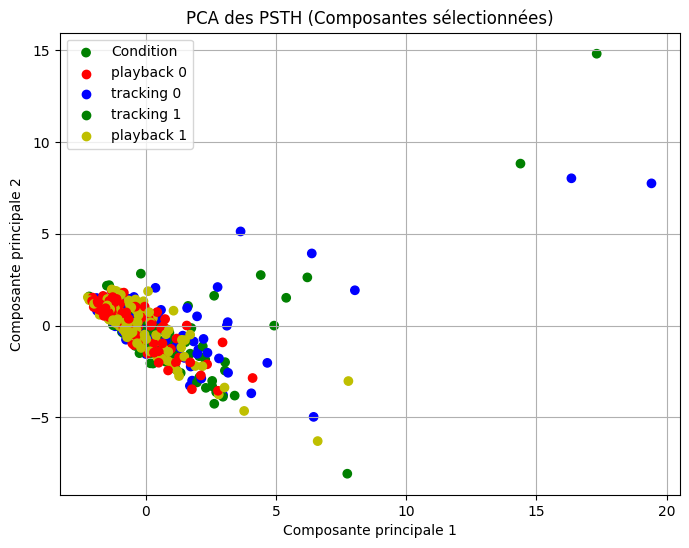

In [5]:
tracking,label_tracking = get_psth_and_labels(data, features, t_pre, t_post, bin_width, gc, 'tracking',frequency_band=[1500,2000])
tracking_transpose = np.moveaxis(tracking, 1, 0)
playback,label_playback = get_psth_and_labels(data, features, t_pre, t_post, bin_width, gc, 'playback',frequency_band=[1500,2000])
playback_transpose = np.moveaxis(playback, 1, 0)
c0 = np.vstack((tracking_transpose, playback_transpose)) #format (9182, 31, 140)  trigger*cluster*nbr bin
print(tracking_transpose.shape)
bin = 60
c0_bin = c0[:,:,bin]
print(f"c0 {c0.shape}") #format (9182, 31)
print(f"c0 bin {c0_bin.shape}")


condition = np.hstack((label_tracking, label_playback)) #format : (9182,)
print(condition.shape)

# # Simulons quelques données PSTH pour plusieurs neurones
psth_data = c0_bin

# Standardisation des données
scaler = StandardScaler()
psth_data_scaled = scaler.fit_transform(psth_data)

# Appliquer la PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(psth_data_scaled)

selected_components = pca_result[:, 0:2]  # Cela prend la 3ème et 4ème composante

print(selected_components.shape)
# Couleurs en fonction des conditions
colors = ['r' if cond == 'p0' else 'b' if cond == 't0' else 'g' if cond == 't1' else 'y' for cond in condition]


# Visualiser les résultats avec les composantes sélectionnées
plt.figure(figsize=(8, 6))
plt.scatter(selected_components[:, 0], selected_components[:, 1], c=colors, marker='o', label='Condition')

# Ajout de la légende et du titre
plt.title('PCA des PSTH (Composantes sélectionnées)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)

# Ajout d'une légende pour les couleurs
plt.scatter([], [], c='r', label='playback 0')
plt.scatter([], [], c='b', label='tracking 0')
plt.scatter([], [], c='g', label='tracking 1')
plt.scatter([], [], c='y', label='playback 1')
plt.legend()
plt.show()

(2314, 60, 140)
c0 bin (2314, 60)
(2314, 2)


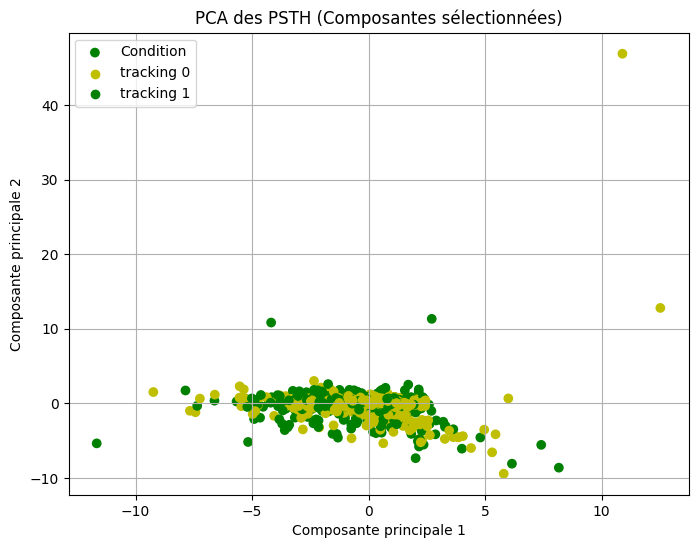

In [23]:
tracking,label_tracking = get_psth_and_labels(data, features, t_pre, t_post, bin_width, gc, 'tracking',frequency_band=[1000,20000])
tracking_transpose = np.moveaxis(tracking, 1, 0)
print(tracking_transpose.shape)
bin = 60
c0_bin = tracking_transpose[:,:,bin]
print(f"c0 bin {c0_bin.shape}")


condition = label_tracking

# # Simulons quelques données PSTH pour plusieurs neurones
psth_data = c0_bin

# Standardisation des données
scaler = StandardScaler()
psth_data_scaled = scaler.fit_transform(psth_data)

# Appliquer la PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(psth_data_scaled)

selected_components = pca_result[:, 2:4]  # Cela prend la 3ème et 4ème composante

print(selected_components.shape)
# Couleurs en fonction des conditions
colors = ['g' if cond == 't1' else 'y' for cond in condition]


# Visualiser les résultats avec les composantes sélectionnées
plt.figure(figsize=(8, 6))
plt.scatter(selected_components[:, 0], selected_components[:, 1], c=colors, marker='o', label='Condition')

# Ajout de la légende et du titre
plt.title('PCA des PSTH (Composantes sélectionnées)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)

# Ajout d'une légende pour les couleurs
plt.scatter([], [], c='y', label='tracking 0')
plt.scatter([], [], c='g', label='tracking 1')
plt.legend()
plt.show()

140
Shape of c0 before reshaping: (927, 140)
Shape of psth_data_scaled: (129780, 1)
Pas assez de dimensions pour la PCA, pas d'application de PCA.
Taille de pca_result: (1818, 2)


ValueError: 'c' argument has 927 elements, which is inconsistent with 'x' and 'y' with size 1818.

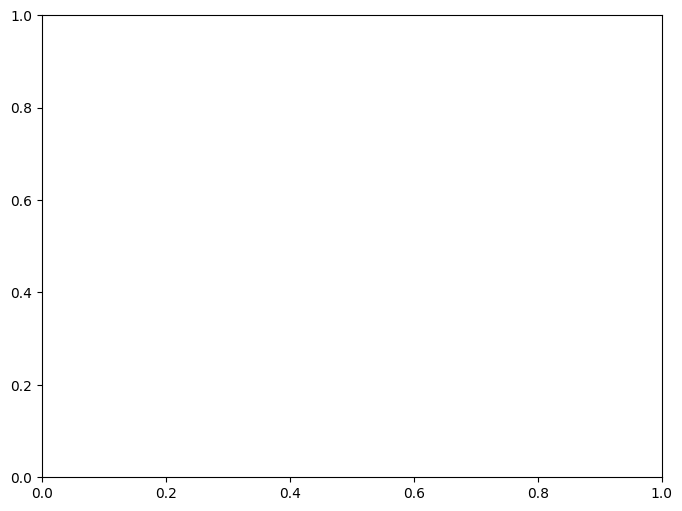

In [44]:
cluster = 8
# Initialiser les listes vides pour le cluster 8
playback_0 = []
playback_1 = []

# Parcourir les éléments de tracking[cluster] et label_tracking
for k in range(len(label_tracking)):
    if label_tracking[k] == 0:
        playback_0.append(tracking[cluster][k])  # Ajouter à playback_0 si label_tracking[k] == 0
    elif label_tracking[k] == 1:
        playback_1.append(tracking[cluster][k])  # Ajouter à playback_1 si label_tracking[k] == 1

# Supposons que pb0_c0 et pb1_c0 soient déjà définis comme des tableaux NumPy 1D
pb0_c0 = np.array(playback_0)  # Assurez-vous que c'est un tableau NumPy 1D
pb1_c0 = np.array(playback_1)  # Assurez-vous que c'est un tableau NumPy 1D

# Combinez les deux tableaux 1D
c0 = np.concatenate((pb0_c0, pb1_c0))
print(len(c0[0]))

# Vérifiez la forme de c0
print("Shape of c0 before reshaping:", c0.shape)

# Reshape c0 en 2D
psth_data = c0.reshape(-1, 1)  # Transforme en tableau 2D avec une colonne

# Standardisation des données
scaler = StandardScaler()
psth_data_scaled = scaler.fit_transform(psth_data)

# Vérifiez la forme après standardisation
print("Shape of psth_data_scaled:", psth_data_scaled.shape)

# Appliquer la PCA
if psth_data_scaled.shape[1] > 1:  # Assurez-vous qu'il y a plus d'une caractéristique
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(psth_data_scaled)
else:
    print("Pas assez de dimensions pour la PCA, pas d'application de PCA.")

# Couleurs en fonction des conditions
label_0 = np.zeros(len(pb0_c0))
label_1 = np.zeros(len(pb1_c0))
condition = np.hstack((label_0, label_1))
colors = ['r' if cond == 0 else 'b' for cond in condition]

# Affichage des résultats
if 'pca_result' in locals():
    print("Taille de pca_result:", pca_result.shape)



# Visualiser les résultats avec des couleurs différentes
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, marker='o', label='Condition')
# Ajout de la légende et du titre
plt.title('PCA des PSTH')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)
# Ajout d'une légende pour les couleurs
plt.scatter([], [], c='r', label='0')
plt.scatter([], [], c='b', label='1')
plt.legend()
plt.show()      